# Projet Exercice KNN

En raison de la simplicité du KNN pour la classification, nous nous concentrerons sur l'utilisation d'un outil PipeLine et d'un outil GridSearchCV, puisque ces compétences peuvent être généralisées pour tout modèle.


## Les données du Sonar

### Détecter un rocher ou une mine

Un sonar (sound navigation ranging) est une technique qui utilise la propagation du son (généralement sous l'eau, comme dans la navigation sous-marine) pour naviguer, communiquer ou détecter des objets sur ou sous la surface de l'eau, comme d'autres navires.

<img src="https://moncoachdata.com/wp-content/uploads/MonCoachData-cours/sonar.jpg"  style="max-height: 500px; max-width: 500px;">

Le dataset contient les mesures de réponse pour 60 fréquences sonar distinctes envoyées contre un champ de mines connu (et des rochers connus). Ces fréquences sont ensuite étiquetées en fonction de l'objet connu sur lequel le son était dirigé (soit un rocher, soit une mine).

<img src="https://moncoachdata.com/wp-content/uploads/MonCoachData-cours/mine.jpg"  style="max-height: 500px; max-width: 500px;">

Notre objectif principal est de créer un modèle de Machine Learning capable de détecter la différence entre un rocher et une mine sur la base de la réponse des 60 fréquences sonar distinctes.


Data Source : https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks)



---
---



### Effectuez les tâches en gras

**Tâche : Exécutez les cellules ci-dessous pour charger les données.**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# LECTURE CSV à éxécuter

# lecture à partir de Github pour pouvoir éxécuter le notebook sans se soucier d'importer le fichier csv
url = 'https://raw.githubusercontent.com/moncoachdata/MasterClass_DS_ML/main/sonar.all-data.csv'
df = pd.read_csv(url)

# Sinon lecture classique en important sur Google Colab ou depuis le chemin exact
# df = pd.read_csv("sonar.all-data.csv")

In [3]:
df.head()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


## Exploration des Données

**Tâche : Créez une heatmap de la corrélation entre les différentes réponses en fréquence.**

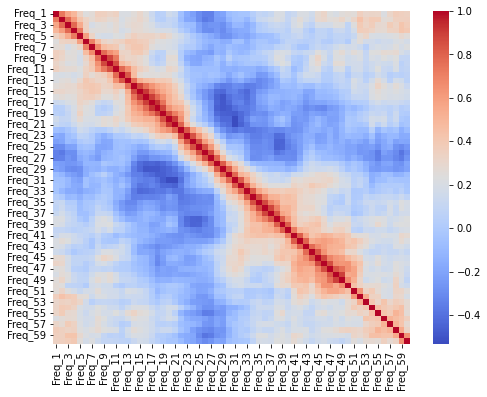

In [4]:
# code ici
plt.figure(figsize=(8,6), dpi=72)
sns.heatmap(df.iloc[:, :-1].corr(), cmap = "coolwarm")
plt.show()

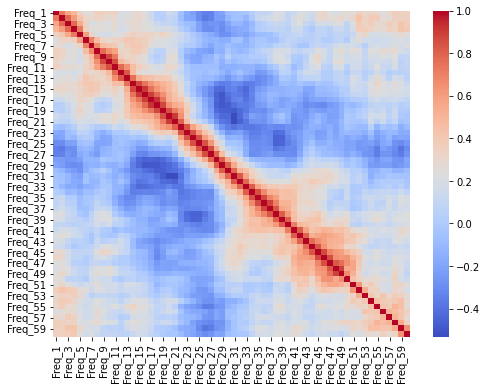

**Tâche : Quelles sont les 5 fréquences les plus corrélées avec la variable cible (label/target) ?**

*Note : Vous devrez souvent faire correspondre le label ou l'étiquette à des 0 et des 1.*

*Note supplémentaire : Nous recherchons des valeurs de corrélation **absolues**.*

In [5]:
# code ici
df['Target']=df['Label'].replace({'R':0, 'M':1})
df.drop(columns=['Label']).corr()['Target'].nlargest(6).sort_values()

Freq_45    0.339406
Freq_10    0.341142
Freq_49    0.351312
Freq_12    0.392245
Freq_11    0.432855
Target     1.000000
Name: Target, dtype: float64

Freq_45    0.339406
Freq_10    0.341142
Freq_49    0.351312
Freq_12    0.392245
Freq_11    0.432855
Target     1.000000
Name: Target, dtype: float64

## Fractionnement Entraînement / Test

Notre approche ici consistera à utiliser la validation croisée (Cross Validation) sur 90% de l'ensemble de données, puis à juger nos résultats sur un ensemble de test final de 10% pour évaluer notre modèle.

**Tâche : Séparez les données en Features et en Label, puis divisez-les en un ensemble d'entraînement et un ensemble de test, avec 90 % pour l'entraînement (pour la validation croisée) et 10 % pour l'ensemble de test final.**

*Note : La solution utilise un random_state de 42*

In [6]:
# code ici
from sklearn.model_selection import train_test_split
X = df.iloc[:, :-2].values
y = df['Label'].values
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.1, random_state=42)

**Tâche : Créer un PipeLine qui contient à la fois un StandardScaler et un modèle KNN.**

In [7]:
# code ici
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

pipeline = Pipeline([
    ('scaler', StandardScaler()),  
    ('knn', KNeighborsClassifier())  
])

**Tâche : Effectuer une recherche par grille (GridSearch) avec le pipeline pour tester différentes valeurs de k et rapporter les paramètres les plus performants.**

In [8]:
# code ici
from sklearn.model_selection import GridSearchCV
params={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]}
grid_cv_model=GridSearchCV(cv=5,
                estimator = pipeline,
                param_grid = params,
                scoring='accuracy')
print(grid_cv_model.fit(X_train,y_train))

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')


In [9]:
grid_cv_model.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=1))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=1),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 1,
 'knn__p': 2,
 'knn__weights': 'uniform'}

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')

{'knn': KNeighborsClassifier(n_neighbors=1),
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 1,
 'knn__p': 2,
 'knn__weights': 'uniform',
 'memory': None,
 'scaler': StandardScaler(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=1))],
 'verbose': False}

**Tâche (difficile) : En utilisant le dictionnaire .cv_results_, voyez si vous pouvez créer un graphique de la moyenne des scores de test (mean_test_score) par valeur K.**

In [10]:
# code ici
results = grid_cv_model.cv_results_
results['mean_test_score']

array([0.84537696, 0.78065434, 0.77524893, 0.75917496, 0.75931721,
       0.74822191, 0.75945946, 0.71664296, 0.7113798 , 0.68421053,
       0.70042674, 0.68435277, 0.68449502, 0.67908962, 0.69530583,
       0.68990043, 0.7113798 , 0.70042674, 0.72204836, 0.67908962,
       0.70071124, 0.69530583, 0.69530583, 0.68463727, 0.68477952,
       0.67923186, 0.67411095, 0.65775249, 0.6685633 ])

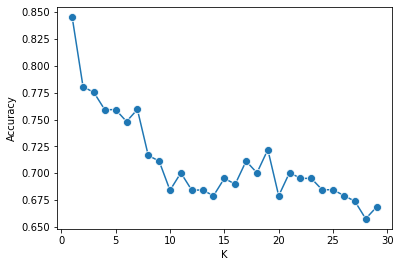

In [11]:
plt.figure(figsize=(6,4), dpi=72)
sns.lineplot(x='param_knn__n_neighbors', y='mean_test_score', data=results, marker='o', linewidth=1.5, markersize=8)
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.gca().yaxis.set_major_formatter('{:.3f}'.format)
plt.show()

array([0.84537696, 0.78065434, 0.77524893, 0.75917496, 0.75931721,
       0.74822191, 0.75945946, 0.71664296, 0.7113798 , 0.68421053,
       0.70042674, 0.68435277, 0.68449502, 0.67908962, 0.69530583,
       0.68990043, 0.7113798 , 0.70042674, 0.72204836, 0.67908962,
       0.70071124, 0.69530583, 0.69530583, 0.68463727, 0.68477952,
       0.67923186, 0.67411095, 0.65775249, 0.6685633 ])

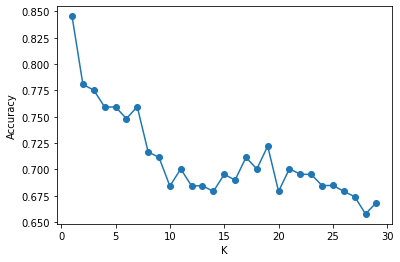

## Évaluation finale du modèle

**Tâche : En utilisant l'objet de grille classificateur (grid classifier) de l'étape précédente, obtenez un rapport final de classification des performances et une matrice de confusion.**

In [12]:
# code ici
from sklearn.metrics import classification_report, confusion_matrix
y_pred = grid_cv_model.best_estimator_.predict(X_test)
confusion_matrix(y_test, y_pred).astype(int)

array([[12,  1],
       [ 1,  7]])

In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           M       0.92      0.92      0.92        13
           R       0.88      0.88      0.88         8

    accuracy                           0.90        21
   macro avg       0.90      0.90      0.90        21
weighted avg       0.90      0.90      0.90        21



array([[12,  1],
       [ 1,  7]])

              precision    recall  f1-score   support

           M       0.92      0.92      0.92        13
           R       0.88      0.88      0.88         8

    accuracy                           0.90        21
   macro avg       0.90      0.90      0.90        21
weighted avg       0.90      0.90      0.90        21



**Bon courage!**